Model Evaluation:
Accuracy : 0.6
Precision: 0.5
Recall   : 0.12

Classification Report:
                precision    recall  f1-score   support

bargain_hunter       0.61      0.92      0.73        12
 premium_buyer       0.50      0.12      0.20         8

      accuracy                           0.60        20
     macro avg       0.56      0.52      0.47        20
  weighted avg       0.57      0.60      0.52        20



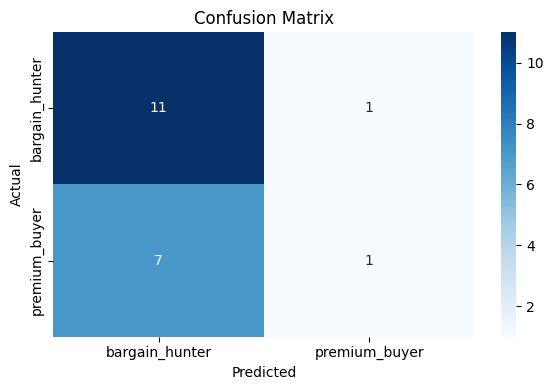

In [9]:
# --------------------------------------
# Customer Behavior Prediction (Working Code)
# --------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score
)
from sklearn.preprocessing import LabelEncoder

# Step 1: Load CSV data
# Make sure your CSV contains: total_spent, avg_purchase_value, visits_per_month, buyer_type
df = pd.read_csv('customer_behavior.csv')  # Replace with actual file name

# Step 2: Encode 'buyer_type' into numeric labels
# 'bargain hunter' -> 0, 'premium buyer' -> 1
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['buyer_type'])

# Step 3: Select features and label
X = df[['total_spent', 'avg_purchase_value', 'visits_per_month']]
y = df['label']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 6: Predict on test set
y_pred = model.predict(X_test)

# Step 7: Print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Accuracy : {round(accuracy, 2)}")
print(f"Precision: {round(precision, 2)}")
print(f"Recall   : {round(recall, 2)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Step 8: Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
